# 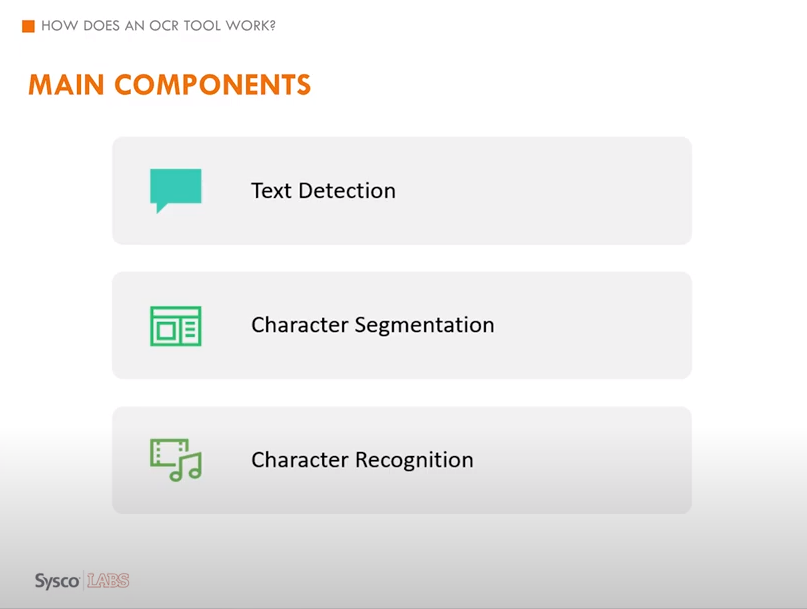

links
https://www.youtube.com/watch?v=6OQZgPFBtfU&t=2s

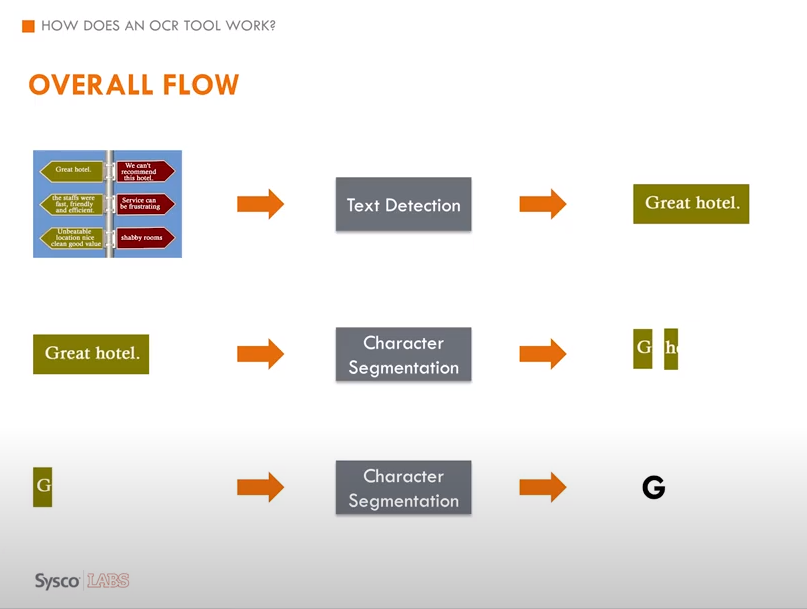

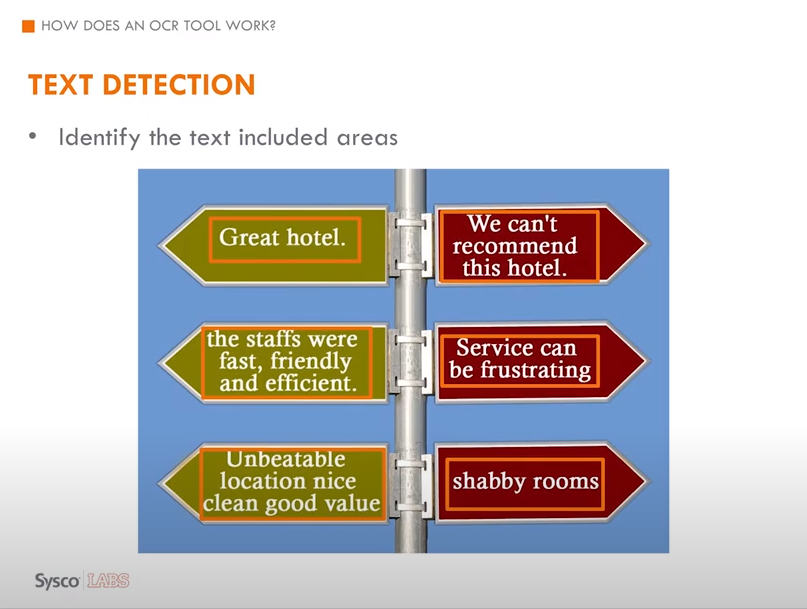

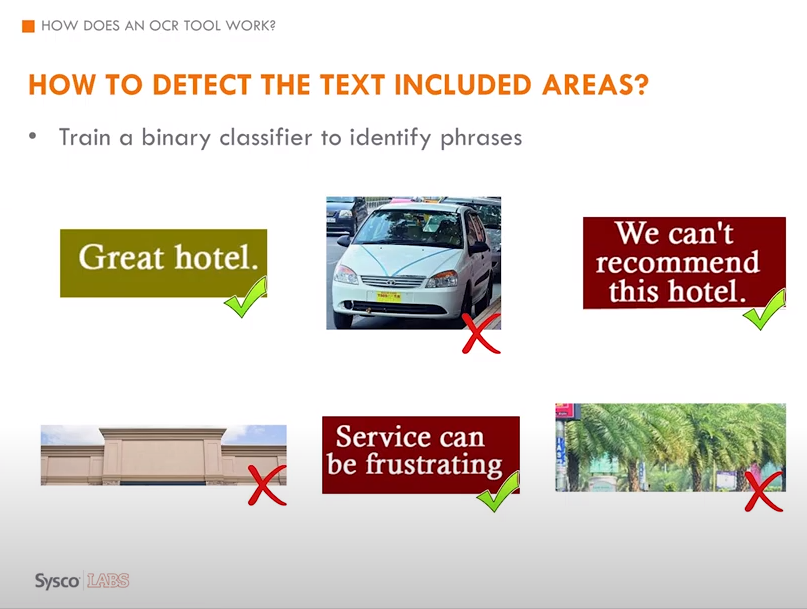

In [1]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.image as mpimg

/home/jayasanka/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [2]:
IMAGE_PATH = 'page.jpg'
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[187, 217], [432, 217], [432, 270], [187, 270]],
  'CollegeBoard',
  0.9998370802895274),
 ([[150, 578], [1040, 578], [1040, 677], [150, 677]],
  'Answer Explanations',
  0.919579051641082),
 ([[148, 671], [954, 671], [954, 748], [148, 748]],
  'SAT Practice Test #1',
  0.7310676625899964),
 ([[165, 1397], [801, 1397], [801, 1418], [165, 1418]],
  '2015 The College Board. College Board; SAT,and the acorn logo are registered trademarks of the College Board',
  0.6798760631080469),
 ([[996, 1390], [1074, 1390], [1074, 1416], [996, 1416]],
  '5KSAO9',
  0.3427554272096115)]

In [3]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

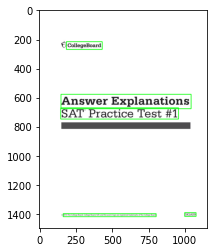

In [4]:
img = cv2.imread(IMAGE_PATH)
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    #img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15
#print(img)   
plt.imshow(img)
plt.show()

In [5]:
crop_phrases=[]
for detection in result:
    top_right = tuple(detection[0][1])
    bottom_left = tuple(detection[0][3])
    y1=top_right[1]
    x2=top_right[0]
    y2=bottom_left[1]
    x1=bottom_left[0]
# Sperate number and gibe prediction
    curr_num = img[y1:y2,x1:x2]
    #print(curr_num)
#curr_num = cv2.resize(curr_num, dsize=(digit_w, digit_h))
    #_, curr_num = cv2.threshold(curr_num, 220, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    crop_phrases.append(curr_num)
#print(crop_phrases)

In [6]:
import matplotlib.gridspec as gridspec

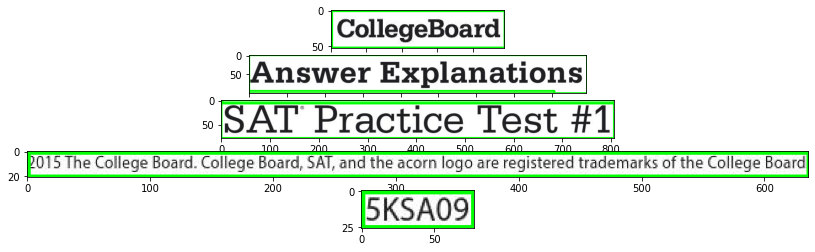

In [7]:
fig = plt.figure(figsize=(14,4))
grid = gridspec.GridSpec(ncols=1,nrows=len(crop_phrases),figure=fig)

for i in range(len(crop_phrases)):
    fig.add_subplot(grid[i])
    plt.imshow(crop_phrases[i])

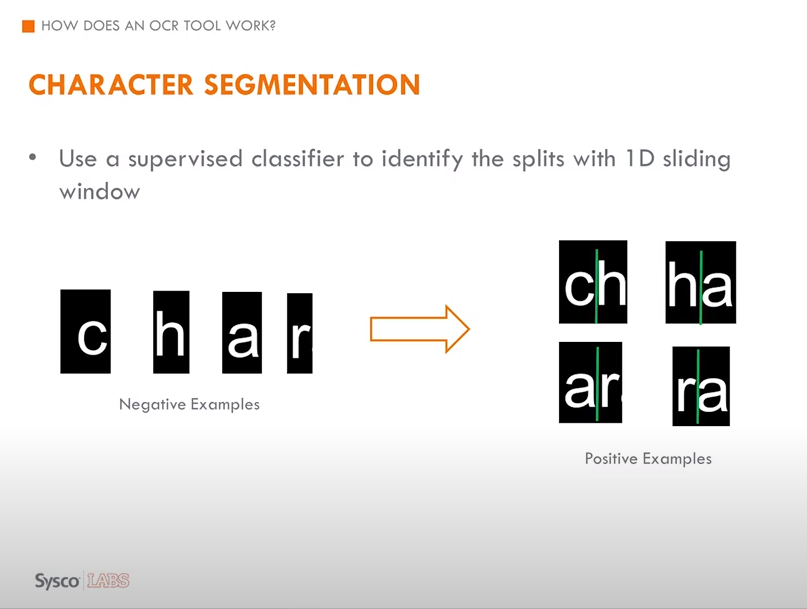

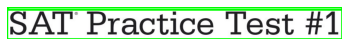

In [8]:
Img=crop_phrases[2]
plt.axis(False)
plt.imshow(Img)

In [9]:
 # Scales, calculates absolute values, and converts the result to 8-bit.
#plate_image = cv2.convertScaleAbs(Img, alpha=(255.0))
plate_image=Img    
    # convert to grayscale and blur the image
gray = cv2.cvtColor(plate_image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(7,7),0)
    
    # Applied inversed thresh_binary 
binary = cv2.threshold(blur, 180, 255,
                         cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    
kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
thre_mor = cv2.morphologyEx(binary, cv2.MORPH_DILATE, kernel3)

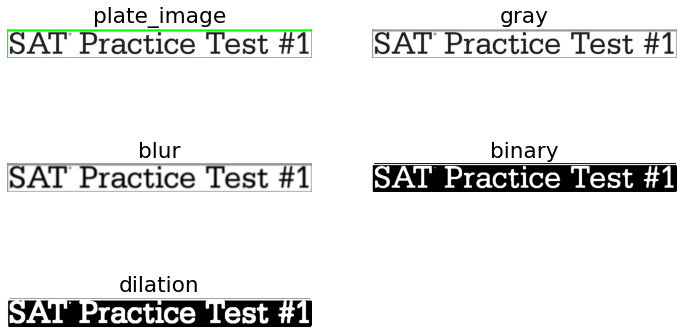

In [10]:
# visualize results    
fig = plt.figure(figsize=(12,7))
plt.rcParams.update({"font.size":18})
grid = gridspec.GridSpec(ncols=2,nrows=3,figure = fig)
plot_image = [plate_image, gray, blur, binary,thre_mor]
plot_name = ["plate_image","gray","blur","binary","dilation"]

for i in range(len(plot_image)):
    fig.add_subplot(grid[i])
    plt.axis(False)
    plt.title(plot_name[i])
    if i ==0:
        plt.imshow(plot_image[i])
    else:
        plt.imshow(plot_image[i],cmap="gray")

# plt.savefig("threshding.png", dpi=300

Detect 21 letters...


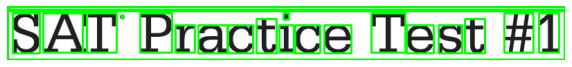

In [11]:
# Create sort_contours() function to grab the contour of each digit from left to right
def sort_contours(cnts,reverse = False):
    i = 0
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))
    return cnts

cont, _  = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


# creat a copy version "test_roi" of plat_image to draw bounding box
test_roi = plate_image.copy()

# Initialize a list which will be used to append charater image
crop_characters = []

# define standard width and height of character
digit_w, digit_h = 60, 60

for c in sort_contours(cont):
    (x, y, w, h) = cv2.boundingRect(c)
    # Draw bounding box arroung digit number
    cv2.rectangle(test_roi, (x, y), (x + w, y + h), (0, 255,0), 2)

    # Sperate number and gibe prediction
    curr_num = thre_mor[y:y+h,x:x+w]
    curr_num = cv2.resize(curr_num, dsize=(digit_w, digit_h))
    _, curr_num = cv2.threshold(curr_num, 220, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    crop_characters.append(curr_num)

print("Detect {} letters...".format(len(crop_characters)))
fig = plt.figure(figsize=(10,6))
plt.axis(False)
plt.imshow(test_roi)
#plt.savefig('grab_digit_contour.png',dpi=300)

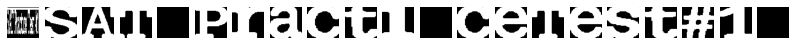

In [12]:
fig = plt.figure(figsize=(14,4))
grid = gridspec.GridSpec(ncols=len(crop_characters),nrows=1,figure=fig)

for i in range(len(crop_characters)):
    fig.add_subplot(grid[i])
    plt.axis(False)
    plt.imshow(crop_characters[i],cmap="gray")
    #plt.savefig("segmented_leter.png")

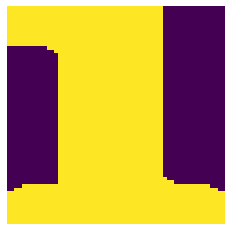

In [13]:
plt.axis(False)
plt.imshow(crop_characters[10])
plt.savefig("segmented_leter0.png")



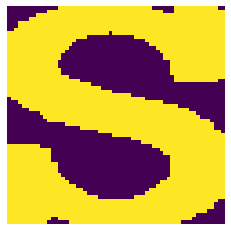

In [14]:
plt.axis(False)
plt.imshow(crop_characters[1])
plt.savefig("segmented_leter1.png")

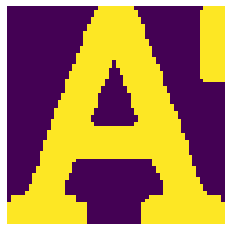

In [15]:
plt.axis(False)
plt.imshow(crop_characters[2])
plt.savefig("segmented_leter2.png")